# Image classification with Convolutional Neural Networks (CNN)

In [1]:
import sys

sys.path.append("../")

import keras

import matplotlib.pyplot as plt
import numpy as np

from cnn import CNN

2025-01-11 01:42:39.551747: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736570559.564166   16394 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736570559.567900   16394 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-11 01:42:39.582104: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
classes = np.array([*range(10)])

In [4]:
x_train = x_train.astype(float) / 255.0
x_train = x_train.reshape(
    (x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
)

x_test = x_test.astype(float) / 255.0
x_test = x_test.reshape(
    (x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
)

In [5]:
y_train = keras.utils.to_categorical(
    x=y_train, 
    num_classes=len(classes)
)
y_test = keras.utils.to_categorical(
    x=y_test, 
    num_classes=len(classes)
)

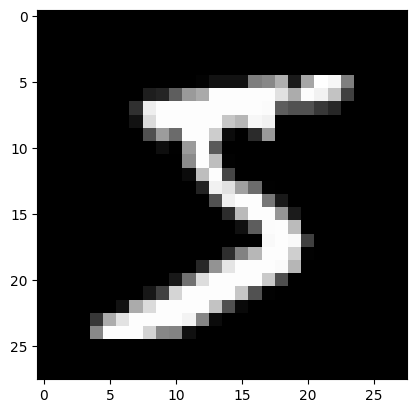

In [6]:
plt.imshow(x_train[0], cmap="gray")
plt.show()

In [7]:
cnn_classifer = CNN(
    input_shape=x_train[0].shape,
    num_classes=len(classes),
    filters=[28,14],
    kernel_size=3,
    strides=(2,2), 
    padding="valid", 
    activation="relu", 
    loss_func="categorical_crossentropy",
    use_bias=False, 
    maxpooling=True, 
    batch_normalization=False, 
    dropout=True, 
    dropout_rate=0.25
)

I0000 00:00:1736570563.613690   16394 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 12130 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080 SUPER, pci bus id: 0000:09:00.0, compute capability: 8.9


In [8]:
cnn_classifer.cnn_net.summary()

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 13, 13, 28)     │           252 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 6, 6, 28)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 2, 2, 14)       │         3,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 1, 14)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 1, 14)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           140 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,920 (15.31 KB)

 Trainable params: 3,920 (15.31 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
cnn_classifer.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
)

In [10]:
cnn_classifer.fit(x=x_train, y=y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


I0000 00:00:1736570567.830929   16491 service.cc:148] XLA service 0x7857580053f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736570567.830951   16491 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 SUPER, Compute Capability 8.9
2025-01-11 01:42:47.841354: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1736570567.879836   16491 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-01-11 01:42:48.276246: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.
I0000 00:00:

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.1180 - val_loss: 0.3312
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3228 - val_loss: 0.2460
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2519 - val_loss: 0.2144
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2088 - val_loss: 0.1917
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1904 - val_loss: 0.1669
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 990us/step - loss: 0.1702 - val_loss: 0.1596
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step - loss: 0.1564 - val_loss: 0.1546
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 986us/step - loss: 0.1496 - val_loss: 0.1425
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 983us/step - loss: 0.1411 - val_loss: 0.1356
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - loss: 0.1325 - val_loss: 0.1318


In [11]:
y_pred = cnn_classifer.predict(x=x_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 503us/step


In [12]:
y_pred = classes[np.argmax(y_pred, axis=-1)]

In [13]:
y_true = classes[np.argmax(y_train, axis=-1)]

In [14]:
(y_true == y_pred).sum()/y_true.shape[0]

np.float64(0.9609666666666666)

In [15]:
y_pred = cnn_classifer.predict(x=x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step


In [16]:
y_pred = classes[np.argmax(y_pred, axis=-1)]

In [17]:
y_true = classes[np.argmax(y_test, axis=-1)]

In [18]:
(y_true == y_pred).sum()/y_true.shape[0]

np.float64(0.9595)